# Matplotlib knowledge

## 1-Backend layer
###  FigureCanvas: matplotlib.backend_bases.FigureCanvas
-Encompasses the area onto which the figure is drawn

###  Render: matplotlib.backend_bases.Render

###  Event matplotlib.backend_bases.Event

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

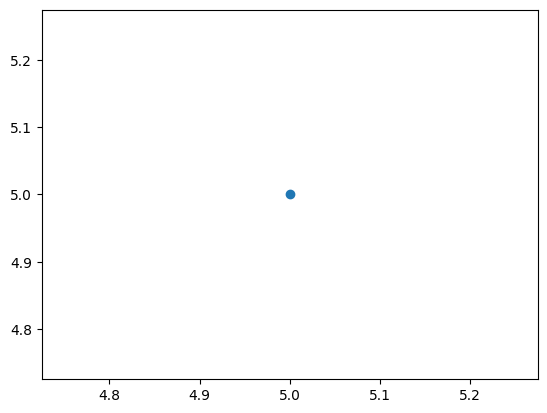

In [29]:
plt.plot(5, 5, 'o')


In [36]:
import numpy as np
import pandas as pd

In [35]:
pip install openpyxl # for read exel file in pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 733.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [40]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [42]:
df_can.columns
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [43]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


To get the index and columns as lists, we can use the `tolist()` method.

In [ ]:
df_can.columns.tolist()
df_can.index.tolist()

In [ ]:
# size of dataframe (rows, columns)
df_can.shape

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [50]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

In [ ]:
df_can.isnull().sum()

## Indexing and Selection (slicing)

### Select Column
**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
```python
    df.column_name               # returns series
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']                  # returns series
```

```python 
    df[['column 1', 'column 2']]  # returns dataframe
```
---


### Select Row

There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```


In [59]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [55]:
# to remove the name of the index
df_can.index.name = None

Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
    1. The full row data (all columns)
    2. For year 2013
    3. For years 1980 to 1985


In [ ]:
# 1. the full row data (all columns)
df_can.loc['Japan']

In [ ]:
# alternate methods
df_can.iloc[87]

In [ ]:
df_can[df_can.index == 'Japan']

In [ ]:
# 2. for year 2013
df_can.loc['Japan', 2013]

In [ ]:
# alternate method
# year 2013 is the last column, with a positional index of 36
df_can.iloc[87, 36]

In [ ]:
# 3. for years 1980 to 1985
df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

In [ ]:
# Alternative Method
df_can.iloc[87, [3, 4, 5, 6, 7, 8]]

In [ ]:
# convert all column names to string
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

In [68]:
years = list(map(str, range(1980, 2014)))

### Filtering based on a criteria

In [ ]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

In [ ]:
# 2. pass this condition into the dataFrame
df_can[condition]

In [ ]:
# find rows contain strings
title = df['text_column'].str.contains('text term')
df [title]

In [ ]:
# multiple criteria .
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

### Sorting Values of a Dataframe or Series
```df.sort_values(col_name, axis=0, ascending=True, inplace=False, ignore_index=False)```<br><br>
col_nam - the column(s) to sort by. <br>
axis - axis along which to sort. 0 for sorting by rows (default) and 1 for sorting by columns.<br>
ascending - to sort in ascending order (True, default) or descending order (False).<br>
inplace - to perform the sorting operation in-place (True) or return a sorted copy (False, default).<br>
ignore_index - to reset the index after sorting (True) or keep the original index values (False, default).<br>

In [ ]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_can.sort_values(by=['Seniority','Salary'],ascending=[False,True])
